<h2 align="center"> Profit Prediction using Linear Regression </h2>

### Import necessary libraries
---

In [28]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [29]:
import numpy as np
import pandas as pd  
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 8)

### Dataset

----

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
data = pd.read_csv(r'/content/drive/MyDrive/bike_sharing_data.txt')
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


### Data Visualization
---

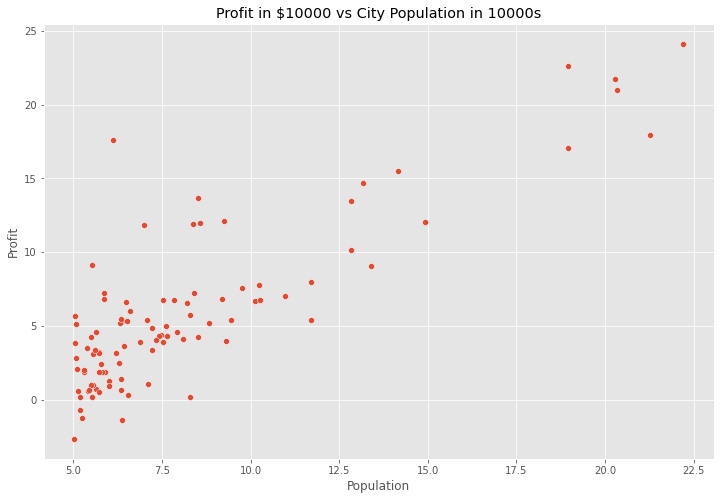

In [6]:
ax =  sns.scatterplot(x='Population', y='Profit', data=data)
ax.set_title("Profit in $10000 vs City Population in 10000s");

### Computing Cost $J(\theta)$
---

In [9]:
def cost_function(x, y, theta):
        m = len(y)
        y_pred = x.dot(theta)
        error = (y_pred - y)**2
        
        return 1/(2*m)*np.sum(error)

In [11]:
m = data.Population.values.size
x = np.append(np.ones((m, 1)), data.Population.values.reshape(m, 1), axis=1)
y=data.Profit.values.reshape(m, 1)
theta = np.zeros((2,1))

cost_function(x, y, theta)

32.072733877455676

### Gradient Descent
---

In [13]:
def gradient_descent(x, y, theta, alpha, iterations):
    m=len(y)
    costs = []
    for i in range(iterations):
        y_pred = x.dot(theta)
        error = np.dot(x.transpose(), (y_pred - y))
        theta -= alpha*1/m * error
        costs.append(cost_function(x, y, theta))
    
    return theta, costs

In [14]:
theta, costs = gradient_descent(x, y, theta, alpha=0.01, iterations=2000)
print("h(x) = {}+ {}x1".format(str(round(theta[0,0], 2)), str(round(theta[1,0], 2))))

h(x) = -3.79+ 1.18x1


### Visualising the Cost Function $J(\theta)$
---

In [15]:
from mpl_toolkits.mplot3d import Axes3D

In [16]:
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1, -4, 100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i], theta_1[j]])
        cost_values[i, j] = cost_function(x, y, t)

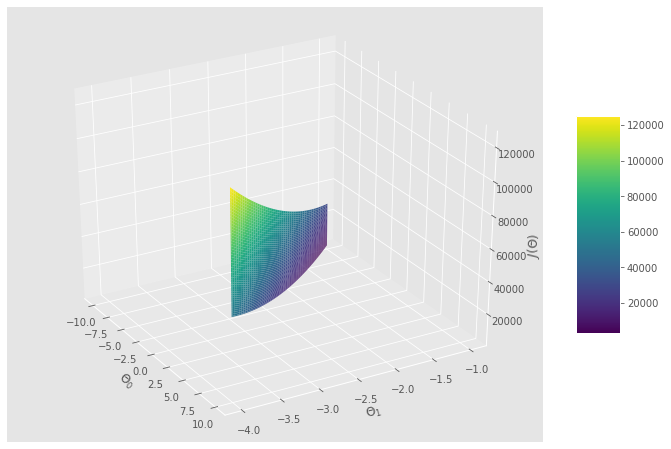

In [17]:
fig = plt.figure(figsize = (12, 8))
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap = 'viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.view_init(30, 330)

plt.show()

### Plotting the Convergence
---

Text(0.5, 1.0, 'values of the cost function over ietrations of gradient descent')

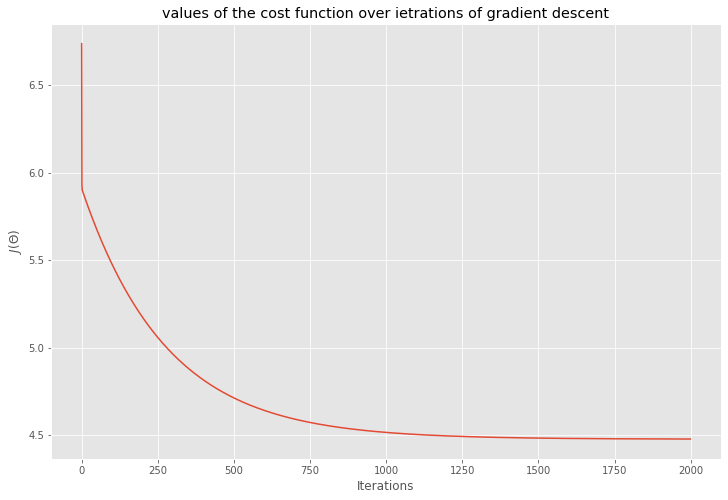

In [19]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("values of the cost function over ietrations of gradient descent")

### Training Data with Linear Regression Fit
---

In [20]:
theta.shape

(2, 1)

In [21]:
theta

array([[-3.78806857],
       [ 1.18221277]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Linear Regression Fit')

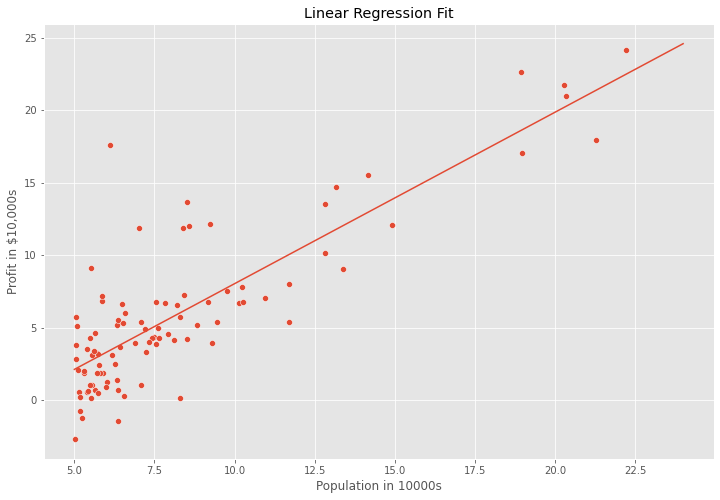

In [22]:
theta = np.squeeze(theta)
sns.scatterplot(x='Population', y='Profit', data=data)

x_value = [x for x in range(5, 25)]
y_value = [(x*theta[1]+theta[0]) for x in x_value]
sns.lineplot(x_value, y_value)

plt.xlabel("Population in 10000s")
plt.ylabel("Profit in $10,000s")
plt.title("Linear Regression Fit")

### Prediction
---

In [23]:
def predict(x, theta):
    y_pred = np.dot(theta.transpose(), x)
    return y_pred

In [24]:
y_pred_1 = predict(np.array([1,4]), theta) * 10000
print("For a Population of 40000 people, the model prodicts a profit of $" + str(round(y_pred_1,0)))

For a Population of 40000 people, the model prodicts a profit of $9408.0


In [25]:
y_pred_2 = predict(np.array([1,8.3]), theta) * 10000
print("For a Population of 83000 people, the model prodicts a profit of $" + str(round(y_pred_2,0)))

For a Population of 83000 people, the model prodicts a profit of $60243.0
